## Resumo do Capítulo 8: Projeto de Filtros IIR

O Capítulo 8 aborda o projeto de **filtros digitais IIR** (resposta ao impulso infinita), que possuem a vantagem de poderem ser derivados de filtros analógicos bem estabelecidos. Os principais tópicos são:

1. **Fundamentos de Filtros IIR**:  
   - Filtros IIR têm resposta ao impulso de duração infinita e podem ser projetados via transformação de filtros analógicos (ex: Butterworth, Chebyshev, elípticos) para o domínio digital.
   - Duas abordagens são apresentadas:
     - **Abordagem 1**: Projetar filtro analógico passa-baixas → Transformação de banda de frequência (analógica) → Transformação analógico-digital.
     - **Abordagem 2**: Projetar filtro analógico passa-baixas → Transformação analógico-digital → Transformação de banda de frequência (digital).

2. **Filtros Especiais**:
   - **Ressonadores Digitais**: Filtros passa-faixa com polos complexos próximos à circunferência unitária.
   - **Filtros Rejeita-Faixa (Notch)**: Eliminam frequências específicas (ex: 60 Hz).
   - **Filtros Pente (Comb)**: Possuem resposta periódica no domínio da frequência.
   - **Filtros Passa-Tudo**: Mantêm a magnitude constante, usados para equalização de fase.

3. **Filtros Analógicos Prototípicos**:
   - **Butterworth**: Magnitude plana na banda de passagem.
   - **Chebyshev (Tipo I e II)**: Ripple na banda de passagem (Tipo I) ou na banda de rejeição (Tipo II).
   - **Elíptico**: Ripple em ambas as bandas, minimizando a ordem do filtro.

4. **Transformações Analógico-Digital**:
   - **Invariância ao Impulso**: Preserva a resposta ao impulso, mas pode causar *aliasing*.
   - **Transformação Bilinear**: Elimina *aliasing*, mas introduz distorção não linear na frequência.

5. **Projeto com MATLAB**:
   - Funções como `butter`, `cheby1`, `ellip` automatizam o projeto de filtros digitais.

---

### Simulações em Python
Implementação de algumas simulações do capítulo usando `scipy.signal` e `matplotlib`. 

---

#### 1. Ressonador Digital (Seção 8.2.1)
Projeta um ressonador com frequência de ressonância em \(\omega_0 = \pi/3\) e raio dos polos \(r = 0.9\).


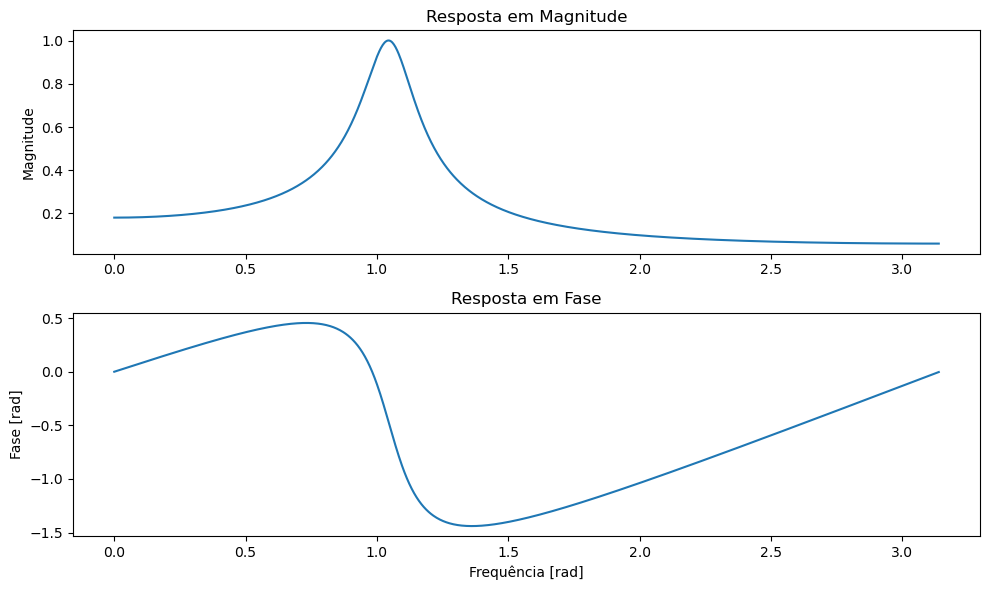

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parâmetros do ressonador
omega0 = np.pi / 3  # Frequência de ressonância
r = 0.9  # Raio dos polos

# Cálculo dos coeficientes
b0 = (1 - r) * np.sqrt(1 + r**2 - 2*r*np.cos(2*omega0))
b = [b0]
a = [1, -2*r*np.cos(omega0), r**2]

# Resposta em frequência
w, h = signal.freqz(b, a, worN=1024)

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h))
plt.title('Resposta em Magnitude')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.title('Resposta em Fase')
plt.xlabel('Frequência [rad]')
plt.ylabel('Fase [rad]')
plt.tight_layout()
plt.show()

#### 2. Filtro Rejeita-Faixa (Notch) (Seção 8.2.2)
Projeta um filtro notch em \(\omega_0 = \pi/4\) com polos para reduzir a largura de banda (\(r = 0.85\)).

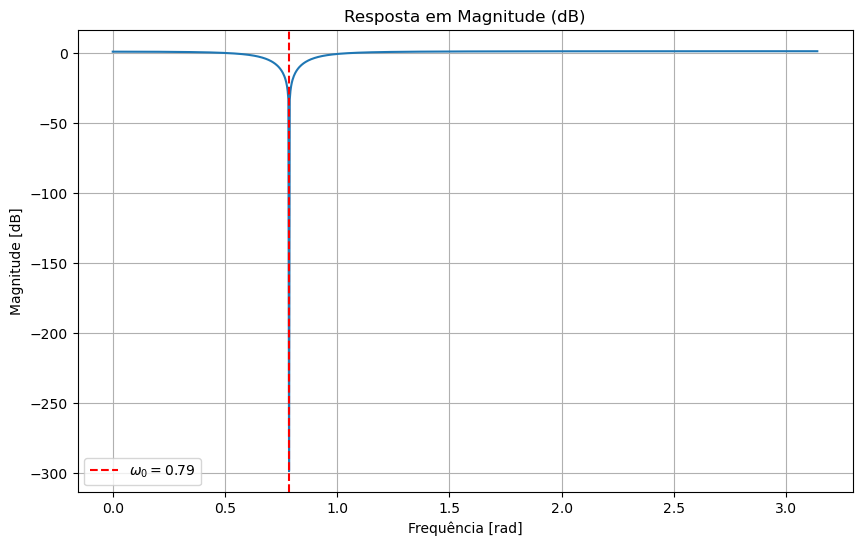

In [5]:
# Parâmetros do filtro notch
omega0 = np.pi / 4  # Frequência a ser rejeitada
r = 0.85  # Raio dos polos

# Coeficientes (zeros no círculo unitário, polos próximos)
b = [1, -2*np.cos(omega0), 1]
a = [1, -2*r*np.cos(omega0), r**2]

# Resposta em frequência
w, h = signal.freqz(b, a, worN=1024)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Resposta em Magnitude (dB)')
plt.xlabel('Frequência [rad]')
plt.ylabel('Magnitude [dB]')
plt.axvline(omega0, color='r', linestyle='--', label=f'$\\omega_0 = {omega0:.2f}$')
plt.legend()
plt.grid()
plt.show()



#### 3. Filtro Butterworth Passa-Baixas (Exemplo 8.17)
Projeta um filtro Butterworth digital com:
- Frequência de passagem: \(\omega_p = 0.2\pi\)
- Frequência de rejeição: \(\omega_s = 0.3\pi\)
- Ripple na passagem: \(R_p = 1\) dB
- Atenuação na rejeição: \(A_s = 15\) dB

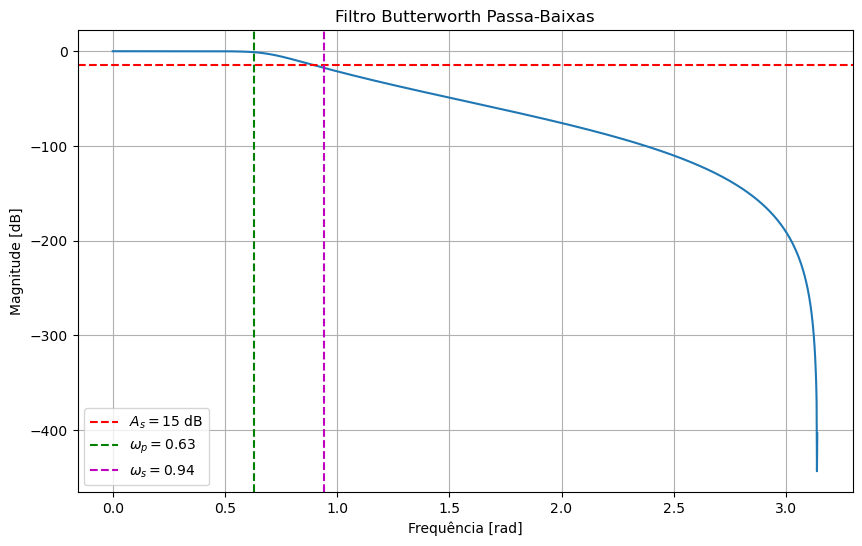

In [7]:
# Especificações
wp = 0.2 * np.pi  # Frequência de passagem
ws = 0.3 * np.pi  # Frequência de rejeição
Rp = 1  # Ripple na passagem (dB)
As = 15  # Atenuação na rejeição (dB)

# Projeto via transformação bilinear
N, wn = signal.buttord(wp/np.pi, ws/np.pi, Rp, As)
b, a = signal.butter(N, wn, btype='low')

# Resposta em frequência
w, h = signal.freqz(b, a, worN=2000)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Filtro Butterworth Passa-Baixas')
plt.xlabel('Frequência [rad]')
plt.ylabel('Magnitude [dB]')
plt.axhline(-As, color='r', linestyle='--', label=f'$A_s = {As}$ dB')
plt.axvline(wp, color='g', linestyle='--', label=f'$\\omega_p = {wp:.2f}$')
plt.axvline(ws, color='m', linestyle='--', label=f'$\\omega_s = {ws:.2f}$')
plt.legend()
plt.grid()
plt.show()

#### 4. Comparação de Filtros (Seção 8.5.1)
Compara as respostas de Butterworth, Chebyshev Tipo I e Elíptico para as mesmas especificações.


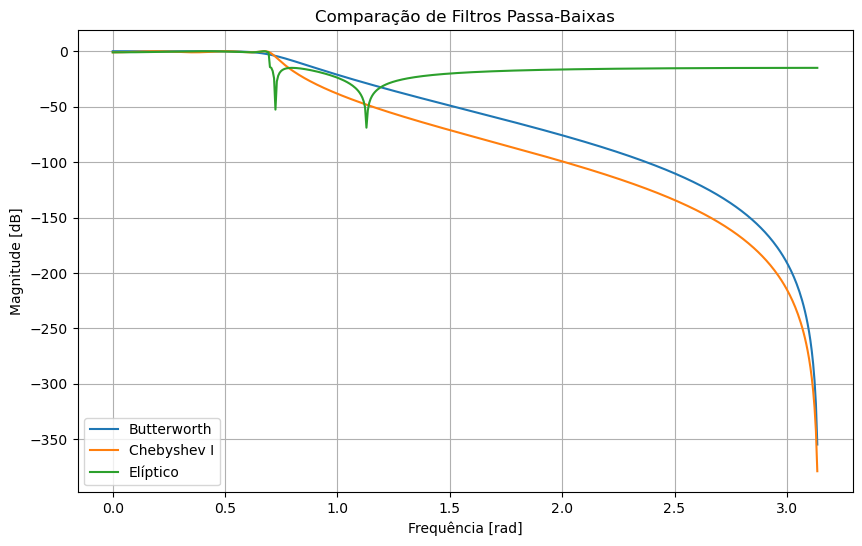

In [9]:
# Projeto dos filtros
b_butter, a_butter = signal.butter(N, wn, btype='low')
b_cheby1, a_cheby1 = signal.cheby1(N, Rp, wn, btype='low')
b_ellip, a_ellip = signal.ellip(N, Rp, As, wn, btype='low')

# Respostas em frequência
w, h_butter = signal.freqz(b_butter, a_butter)
_, h_cheby1 = signal.freqz(b_cheby1, a_cheby1)
_, h_ellip = signal.freqz(b_ellip, a_ellip)

# Plot comparativo
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(h_butter)), label='Butterworth')
plt.plot(w, 20 * np.log10(np.abs(h_cheby1)), label='Chebyshev I')
plt.plot(w, 20 * np.log10(np.abs(h_ellip)), label='Elíptico')
plt.title('Comparação de Filtros Passa-Baixas')
plt.xlabel('Frequência [rad]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid()
plt.show()

# 🎥 Vídeos sobre Filtros Digitais IIR

## Vídeo 1 – Filtros Digitais (UNIVESP)
https://youtu.be/CaXR0WDB-Ww?si=jwJMxISzX8ZILk-C

## Vídeo 2 – Filtros IIR (UNIVESP)
https://youtu.be/V-hSvPQm-ME?si=Yn5ljM-K8s5ukCPi

## Vídeo 3 – Projeto de Filtros (UNIVESP)
https://youtu.be/rgcbsLyf9mM?si=HPAAMyfTfOXQkgmL

## Vídeo 4 – Projetanto Filtros IIR (UNIVESP)
https://youtu.be/jLnhm4JgmCw?si=T1s3o8v-h4K42ZD_